In [7]:
import math
#import itertools
import pandas
import numpy
import networkx

## Simulazione attacco, andamento D e GC in funzione dei nodi rimossi

### Funzioni step-by-step (un nodo per volta)

In [8]:
def attacco(compagnia):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    steps = graphSize
    passo = 1
    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
    diametro.append(2)
    relSizeGC.append(1)

    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        gradiFinal.sort(["grado"], ascending=[False], inplace=True)
        sortedIDnode = gradiFinal['index'].values

        grafoFinal.remove_node(sortedIDnode[0])

        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
        
        i += 100/float(steps)
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        newGraphSize = networkx.number_of_nodes(grafoFinal)
        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(newGraphSize)))

def failure(compagnia):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    steps = graphSize
    passo = 1
    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
    diametro.append(2)
    relSizeGC.append(1)
    
    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        randomante = gradiFinal['index'].values
        randomante = numpy.random.permutation(randomante)

        grafoFinal.remove_node(randomante[0])
    
        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
                            
        i += 100/steps
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        graphSize = networkx.number_of_nodes(grafoFinal)
        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(graphSize)))

### Funzioni a sequenze percentuali

In [9]:
def attaccoPercent(compagnia, steps):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    passo = networkx.number_of_nodes(grafoFinal)/steps

    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
    diametro.append(2)
    relSizeGC.append(1)

    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        gradiFinal.sort(["grado"], ascending=[False], inplace=True)
        sortedIDnode = gradiFinal['index'].values

#        grafoFinal.remove_nodes_from(sortedIDnode[0:passo])
        for identificativo in sortedIDnode:
            if (networkx.number_of_nodes(grafoFinal) > len(sortedIDnode) - passo):
                   grafoFinal.remove_node(identificativo)

        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
        
        i += 100/float(steps)
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        graphSize = networkx.number_of_nodes(grafoFinal)
        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(graphSize)))


def failurePercent(compagnia, steps):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    passo = networkx.number_of_nodes(grafoFinal)/float(steps)
    
    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
    diametro.append(2)
    relSizeGC.append(1)
    
    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        randomante = gradiFinal['index'].values
        randomante = numpy.random.permutation(randomante)

        for identificativo in randomante:
            if (networkx.number_of_nodes(grafoFinal) > len(randomante) - passo):
                grafoFinal.remove_node(identificativo)
    
        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
                            
        i += 100/steps
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        graphSize = networkx.number_of_nodes(grafoFinal)
        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(graphSize)))

In [11]:
colori = ['#004184','#ff3300','#ff8000','#018ECC','#4d4d4d']
#colori = ['#AA3939','#226666','#7A9F35']
#gestore = ["Roma"]
gestore = ["Tim", "Vodafone", "Wind", "Tre"]

In [12]:
#Attacco
diametro = []
relSizeGC = []
aziendaFinal = []
ascisse = []

for provider in gestore:
    #%time attacco(provider)
    %time attaccoPercent(provider, 10)
    
datiFinal = pandas.DataFrame()

datiFinal['percent'] = ascisse
datiFinal['Provider'] = aziendaFinal
datiFinal['diameter'] = diametro
datiFinal['GCsize'] = relSizeGC
#datiFinal.to_csv("/home/protoss/Documenti/SistemiComplessi/data/Iuri/AttackDataForSeaborn.csv")
#datiFinal.head()

CPU times: user 6.31 s, sys: 96 ms, total: 6.4 s
Wall time: 6.37 s
CPU times: user 7.03 s, sys: 60 ms, total: 7.09 s
Wall time: 7.01 s
CPU times: user 16 s, sys: 96 ms, total: 16.1 s
Wall time: 16 s
CPU times: user 3.09 s, sys: 32 ms, total: 3.12 s
Wall time: 3.12 s


/home/protoss/Programmi/VirtualEnvironment/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


CPU times: user 1min 34s, sys: 644 ms, total: 1min 35s  
Wall time: 1min 34s  
CPU times: user 1min 44s, sys: 696 ms, total: 1min 44s  
Wall time: 1min 43s  
CPU times: user 4min 40s, sys: 2.09 s, total: 4min 42s  
Wall time: 4min 40s  
CPU times: user 37.4 s, sys: 188 ms, total: 37.6 s  
Wall time: 37.4 s  
  

In [13]:
#Failure
diametro = []
relSizeGC = []
aziendaFinal = []
ascisse = []

for provider in gestore:
    %time failurePercent(provider, 10)
#    %time failure(provider)
        
datiFinal = pandas.DataFrame()

datiFinal['percent'] = ascisse
datiFinal['Provider'] = aziendaFinal
#datiFinal['diameter'] = diametro
datiFinal['GCsize'] = relSizeGC
datiFinal.to_csv("/home/protoss/Documenti/SistemiComplessi/data/Iuri/ComparazioneFailureRoma.csv")
#datiFinal

CPU times: user 39.1 s, sys: 284 ms, total: 39.4 s
Wall time: 39 s
CPU times: user 30.5 s, sys: 172 ms, total: 30.6 s
Wall time: 30.4 s
CPU times: user 1min 48s, sys: 752 ms, total: 1min 48s
Wall time: 1min 47s
CPU times: user 14.7 s, sys: 108 ms, total: 14.8 s
Wall time: 14.7 s


CPU times: user 7min 42s, sys: 3.14 s, total: 7min 45s  
Wall time: 7min 41s  
CPU times: user 6min 53s, sys: 3.04 s, total: 6min 56s  
Wall time: 6min 52s  
CPU times: user 22min 48s, sys: 9.6 s, total: 22min 57s  
Wall time: 22min 44s  
CPU times: user 3min 7s, sys: 1.29 s, total: 3min 8s  
Wall time: 3min 7s  


## Confronto metodi di attacco (parallelo, sequenziale, sequenziale step-by-step)

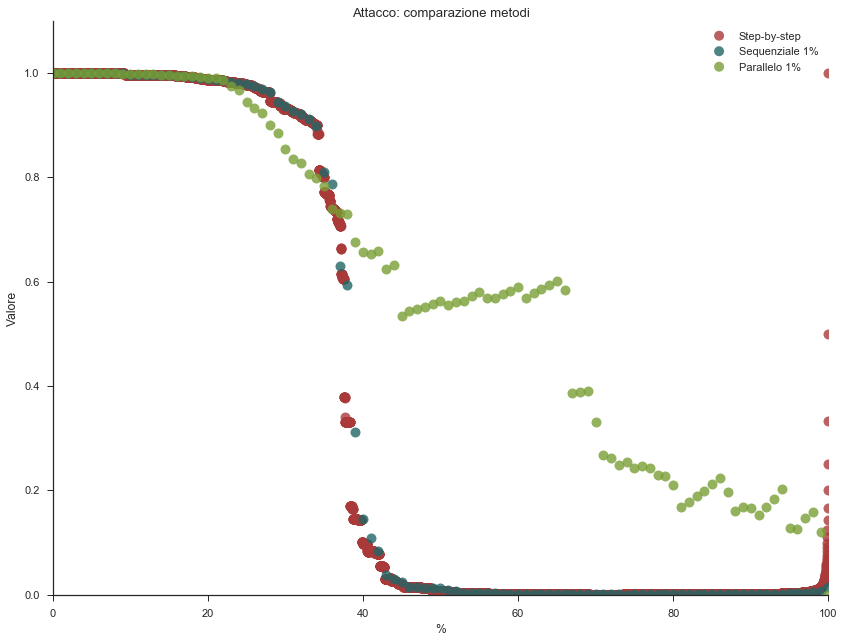

In [8]:
#giant cluster
import seaborn
import pandas

datiFinal = pandas.read_csv('../../data/Iuri/comparazioneAttacchi.csv')

seaborn.set_context("notebook", font_scale=1.1)
seaborn.set_style("ticks")
seaborn.lmplot('percent', 'GC', data=datiFinal, fit_reg=False,
           size = 9, aspect = 1.3333,
           legend = False,
           hue='Strategia', palette = colori,
           scatter_kws={"marker": "D", "s": 100})
pyplot.title('Attacco: comparazione metodi')
pyplot.xlabel("%")
pyplot.ylabel("Valore")
pyplot.xlim(0, 100)
pyplot.ylim(0,1.1)
pyplot.legend()
pyplot.savefig('/home/protoss/Documenti/SistemiComplessi/img/AttackGC_Compare.svg', format='svg', dpi=1000)
pyplot.savefig('/home/protoss/Documenti/SistemiComplessi/img/AttackGC_Compare.eps', format='eps', dpi=1000)

## Calcolo del diametro della rete complessiva impossibile, andamento quadratico con aumentare dei nodi

#### 10 steps

CPU times: user 30.2 s, sys: 156 ms, total: 30.4 s  
Wall time: 30.1 s  
CPU times: user 14.1 s, sys: 56 ms, total: 14.2 s  
Wall time: 14.1 s  
CPU times: user 1min 7s, sys: 352 ms, total: 1min 7s  
Wall time: 1min 6s  
CPU times: user 12 s, sys: 72 ms, total: 12.1 s  
Wall time: 11.9 s


#### 20 steps

CPU times: user 1min 6s, sys: 368 ms, total: 1min 6s  
Wall time: 1min 5s  
CPU times: user 29 s, sys: 176 ms, total: 29.2 s  
Wall time: 28.9 s  
CPU times: user 2min 28s, sys: 848 ms, total: 2min 29s  
Wall time: 2min 27s  
CPU times: user 25.4 s, sys: 116 ms, total: 25.6 s  
Wall time: 25.4 s  

